# Final Project Submission

Please fill out:
* Student name: Eugene Kuloba 
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Antony Muiko
* Blog post URL:

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
plt.style.use('ggplot')

## Does performance of a movie locally affect its international sale?

In [2]:
# Read CSV File
movie_budget_df = pd.read_csv('Data/tn.movie_budgets.csv')
movie_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [3]:
# Check for df info
movie_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [4]:
# Check for missing values
movie_budget_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

* No missing values. We convert [production_budget,domestic_gross,worldwide_gross] to int64

In [5]:
# Remove $ from currency using lambda function
movie_budget_df['production_budget'] = movie_budget_df.production_budget.apply(lambda x: x.replace('$',''))
movie_budget_df['domestic_gross'] = movie_budget_df.domestic_gross.apply(lambda x: x.replace('$',''))
movie_budget_df['worldwide_gross'] = movie_budget_df.worldwide_gross.apply(lambda x: x.replace('$',''))

# Remove ,
movie_budget_df['production_budget'] = movie_budget_df.production_budget.apply(lambda x: x.replace(',',''))
movie_budget_df['domestic_gross'] = movie_budget_df.domestic_gross.apply(lambda x: x.replace(',',''))
movie_budget_df['worldwide_gross'] = movie_budget_df.worldwide_gross.apply(lambda x: x.replace(',',''))

In [6]:
# Display dataFrame
movie_budget_df.head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [7]:
movie_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [8]:
# Convert to integers
movie_budget_df['production_budget'] = movie_budget_df['production_budget'].astype('int64')
movie_budget_df['domestic_gross'] = movie_budget_df['domestic_gross'].astype('int64')
movie_budget_df['worldwide_gross'] = movie_budget_df['worldwide_gross'].astype('int64')


In [9]:
# movie_budget_df.info()
movie_budget_df.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [10]:
movie_budget_df['international_gross'] = (movie_budget_df['worldwide_gross']) - (movie_budget_df['domestic_gross'])
movie_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2015837654
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,107000000
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,944008095
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365


In [11]:
# check for duplicates
movie_budget_df['movie'].duplicated().sum()

84

In [12]:
# remove duplicates
movie_budget_df.drop_duplicates(subset='movie',keep='first',inplace=True)

In [13]:
movie_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5698 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   5698 non-null   int64 
 1   release_date         5698 non-null   object
 2   movie                5698 non-null   object
 3   production_budget    5698 non-null   int64 
 4   domestic_gross       5698 non-null   int64 
 5   worldwide_gross      5698 non-null   int64 
 6   international_gross  5698 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 356.1+ KB


In [14]:
# Calculate the Profit
movie_budget_df['profit'] = (movie_budget_df['worldwide_gross']) - (movie_budget_df['production_budget'])
movie_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2015837654,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,107000000,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,944008095,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365,999721747


In [15]:
# Calculate Percentage Profit
movie_budget_df['percentage_profit'] = (movie_budget_df['profit']/movie_budget_df['production_budget']) * 100
movie_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross,profit,percentage_profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2015837654,2351345279,553.257713
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000,635063875,154.667286
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,107000000,-200237650,-57.210757
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,944008095,1072413963,324.384139
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365,999721747,315.369636


In [16]:
# Summary statistics of the data
movie_budget_df.describe()

,id,production_budget,domestic_gross,worldwide_gross,international_gross,profit,percentage_profit
count,5698.000000,5.698000e+03,5.698000e+03,5.698000e+03,5.698000e+03,5.698000e+03,5698.000000
mean,50.320814,3.181423e+07,4.186763e+07,9.174801e+07,4.988038e+07,5.993378e+07,357.327184
std,28.799762,4.197735e+07,6.833134e+07,1.754208e+08,1.136734e+08,1.466020e+08,2917.540282
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-2.002376e+08,-100.000000
25%,25.000000,5.000000e+06,1.418872e+06,4.112890e+06,0.000000e+00,-2.229934e+06,-51.192268
50%,50.000000,1.700000e+07,1.719656e+07,2.792412e+07,5.800141e+06,8.460828e+06,69.402107
75%,75.000000,4.000000e+07,5.234866e+07,9.808585e+07,4.702451e+07,6.114558e+07,270.229055
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,2.015838e+09,2.351345e+09,179900.000000


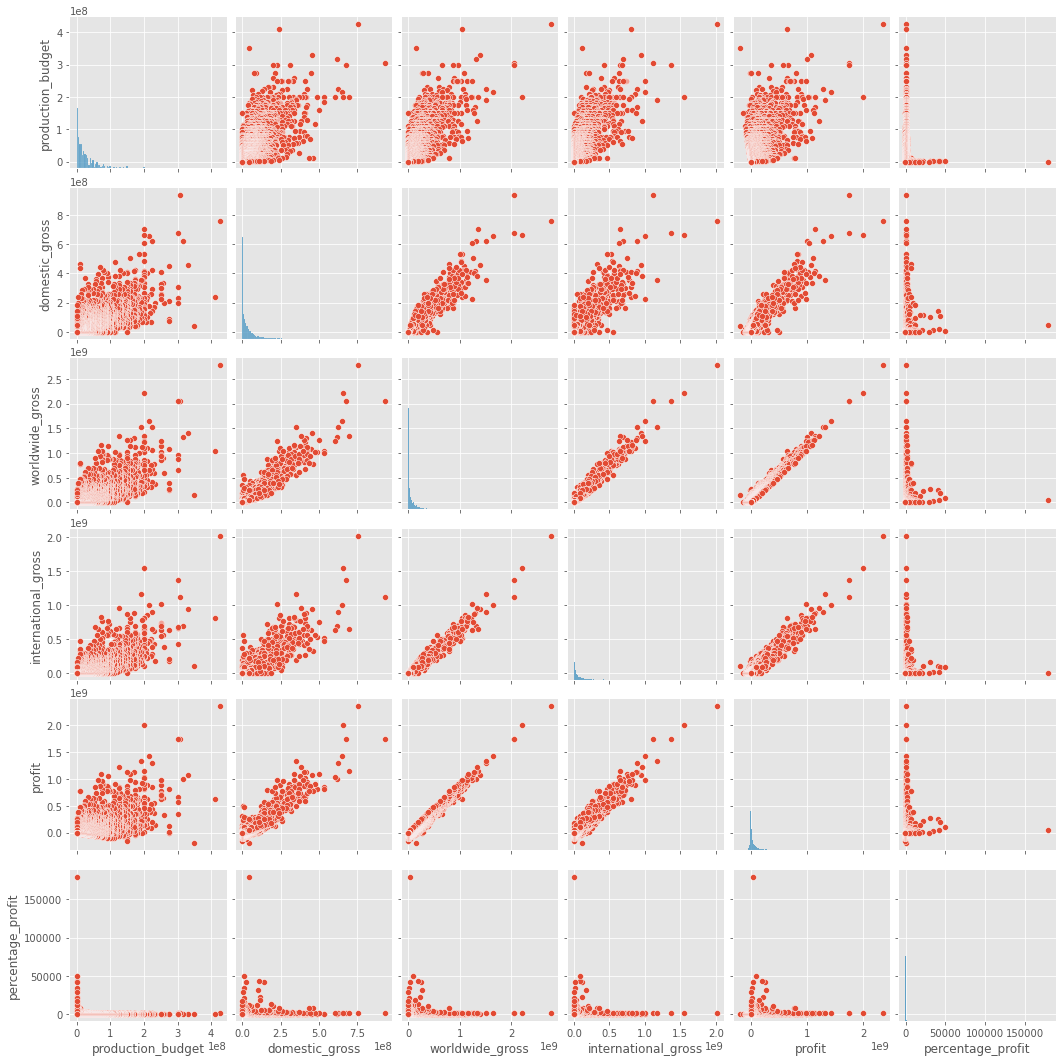

In [17]:
# Pairplot to see correlation
numerical_df = movie_budget_df.drop(['id'], axis =1);
sns.pairplot(numerical_df)

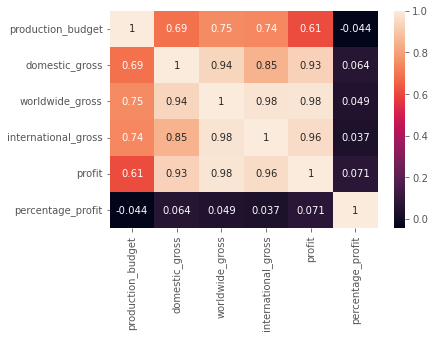

In [18]:
# Heatmap to show the corr values
sns.heatmap(numerical_df.corr(), annot=True);
plt.show()

In [19]:
movie_budget_df[movie_budget_df['domestic_gross'] == 0].value_counts()

id   release_date  movie                     production_budget  domestic_gross  worldwide_gross  international_gross  profit    percentage_profit
1    Dec 1, 2015   Shark Lake                2000000            0               0                0                    -2000000  -100.000000          1
65   Dec 31, 2015  AWOL-72                   3000000            0               0                0                    -3000000  -100.000000          1
67   Nov 20, 2015  Criminal Activities       7000000            0               386744           386744               -6613256  -94.475086           1
     Jun 19, 1987  The Brave Little Toaster  2300000            0               0                0                    -2300000  -100.000000          1
     Feb 6, 2015   Enter the Dangerous Mind  3000000            0               0                0                    -3000000  -100.000000          1
                                                                                                   

In [20]:
# Drop columns where the worldwide_gross is 0
movie_budget_df = movie_budget_df[movie_budget_df['worldwide_gross'] != 0]
movie_budget_df.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross,profit,percentage_profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2015837654,2351345279,553.257713
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000,635063875,154.667286
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,107000000,-200237650,-57.210757
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,944008095,1072413963,324.384139
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365,999721747,315.369636


In [21]:
# Sort by profit descending
movie_budget_df.sort_values(['profit'],ascending=[True])

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross,profit,percentage_profit
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,107000000,-200237650,-57.210757
193,94,"Mar 11, 2011",Mars Needs Moms,150000000,21392758,39549758,18157000,-110450242,-73.633495
341,42,"Jun 14, 2019",Men in Black: International,110000000,3100000,3100000,0,-106900000,-97.181818
352,53,"Apr 27, 2001",Town & Country,105000000,6712451,10364769,3652318,-94635231,-90.128791
404,5,"Aug 16, 2002",The Adventures of Pluto Nash,100000000,4411102,7094995,2683893,-92905005,-92.905005
...,...,...,...,...,...,...,...,...,...
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,996584239,1433854864,666.909239
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1116648995,1747311220,571.016739
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1369318718,1748134200,582.711400
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,1548844451,2008208395,1004.104198


In [22]:
movie_budget_df.sort_values(['production_budget'],ascending=[False])


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross,profit,percentage_profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2015837654,2351345279,553.257713
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000,635063875,154.667286
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,107000000,-200237650,-57.210757
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,944008095,1072413963,324.384139
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365,999721747,315.369636
...,...,...,...,...,...,...,...,...,...
5775,76,"May 26, 2006",Cavite,7000,70071,71644,1573,64644,923.485714
5776,77,"Dec 31, 2004",The Mongol King,7000,900,900,0,-6100,-87.142857
5778,79,"Apr 2, 1999",Following,6000,48482,240495,192013,234495,3908.250000
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,0,-3662,-73.240000


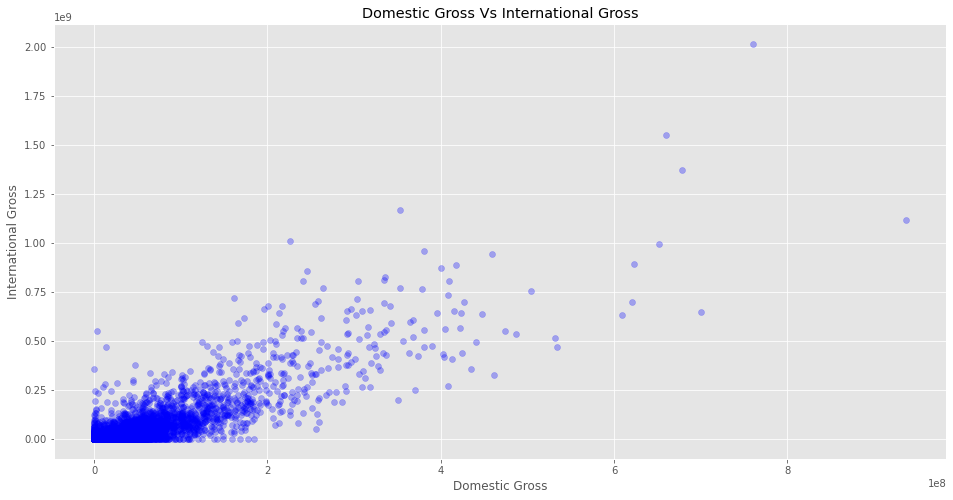

In [23]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter(
    x=movie_budget_df["domestic_gross"],
    y=movie_budget_df["international_gross"],
    alpha=0.3,
    color='blue'
)

ax.set_xlabel("Domestic Gross")
ax.set_ylabel("International Gross")
ax.set_title("Domestic Gross Vs International Gross");

In [24]:
# correlation between column 1 and column2
print("correlation = ",movie_budget_df['domestic_gross'].corr(movie_budget_df['international_gross']))

correlation =  0.8466084670858562


In [25]:
"""
There is a very strong correlation between the domestic gross and international gross.
This may be because as soon as a movie becomes a hit domestically it garners a world wide 
attention hence a high number of people tend to watch the movie. 
With this in mind, one should promote the movie locally so it may get to attract an international audience.
"""

'\nThere is a very strong correlation between the domestic gross and international gross.\nThis may be because as soon as a movie becomes a hit domestically it garners a world wide \nattention hence a high number of people tend to watch the movie. \nWith this in mind, one should promote the movie locally so it may get to attract an international audience.\n'

## Does high production budget equal high profits?

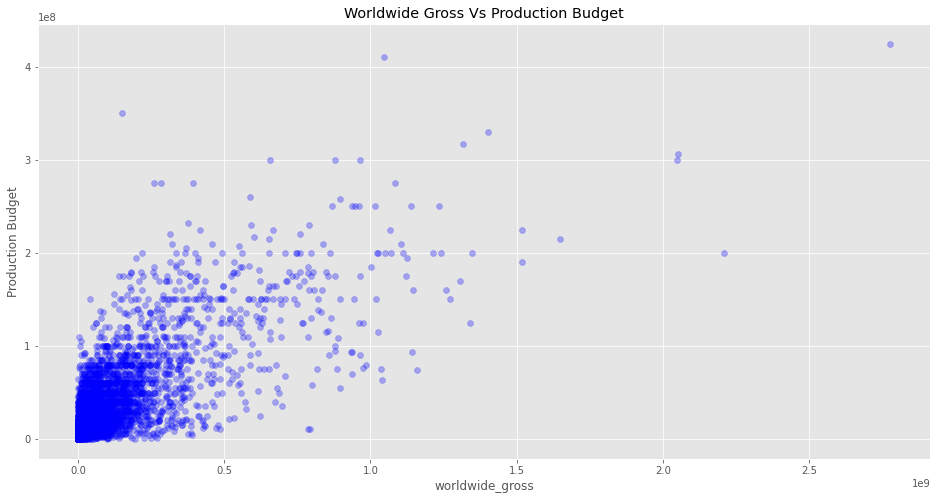

In [26]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter(
    x=movie_budget_df["worldwide_gross"],
    y=movie_budget_df["production_budget"],
    alpha=0.3,
    color='blue'
)

ax.set_xlabel("worldwide_gross")
ax.set_ylabel("Production Budget")
ax.set_title("Worldwide Gross Vs Production Budget");

In [27]:
# correlation between column 1 and column2
print("correlation = ",movie_budget_df['worldwide_gross'].corr(movie_budget_df['production_budget']))

correlation =  0.7475597471230853


In [28]:
"""
Correlation between the production budget and
the worldwide gross is very strong hence the production
budget does affect the worldwide gross that the movie is going to generate.
"""

'\nCorrelation between the production budget and\nthe worldwide gross is very strong hence the production\nbudget does affect the worldwide gross that the movie is going to generate.\n'

## What is the distribution of the languages in this movies?


In [29]:
# load tmbd.movies.csv dataset
tmbd_movies_df = pd.read_csv('data/tmdb.movies.csv')
tmbd_movies_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [30]:
# change column name
tmbd_movies_df.rename(columns={'original_title':'movie'},inplace=True)
tmbd_movies_df.head()

,Unnamed: 0,genre_ids,id,original_language,movie,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [31]:
# Join tmbd_movies_df and movie_budget_df
microsoft_movies_df = tmbd_movies_df.merge(movie_budget_df,on='movie')
microsoft_movies_df.head()

,Unnamed: 0,genre_ids,id_x,original_language,movie,popularity,release_date_x,title,vote_average,vote_count,id_y,release_date_y,production_budget,domestic_gross,worldwide_gross,international_gross,profit,percentage_profit
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,30,"Mar 26, 2010",165000000,217581232,494870992,277289760,329870992,199.921813
1,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,15,"May 7, 2010",170000000,312433331,621156389,308723058,451156389,265.386111
2,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,37,"Nov 22, 1995",30000000,191796233,364545516,172749283,334545516,1115.151720
3,2473,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,37,"Nov 22, 1995",30000000,191796233,364545516,172749283,334545516,1115.151720
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,38,"Jul 16, 2010",160000000,292576195,835524642,542948447,675524642,422.202901


In [32]:
# dataset info
microsoft_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 0 to 2047
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2048 non-null   int64  
 1   genre_ids            2048 non-null   object 
 2   id_x                 2048 non-null   int64  
 3   original_language    2048 non-null   object 
 4   movie                2048 non-null   object 
 5   popularity           2048 non-null   float64
 6   release_date_x       2048 non-null   object 
 7   title                2048 non-null   object 
 8   vote_average         2048 non-null   float64
 9   vote_count           2048 non-null   int64  
 10  id_y                 2048 non-null   int64  
 11  release_date_y       2048 non-null   object 
 12  production_budget    2048 non-null   int64  
 13  domestic_gross       2048 non-null   int64  
 14  worldwide_gross      2048 non-null   int64  
 15  international_gross  2048 non-null   i

In [33]:
# Check for missing values
microsoft_movies_df.isna().sum()

Unnamed: 0             0
genre_ids              0
id_x                   0
original_language      0
movie                  0
popularity             0
release_date_x         0
title                  0
vote_average           0
vote_count             0
id_y                   0
release_date_y         0
production_budget      0
domestic_gross         0
worldwide_gross        0
international_gross    0
profit                 0
percentage_profit      0
dtype: int64

In [34]:
# check for duplicates
microsoft_movies_df.movie.duplicated().sum()

303

In [35]:
# Drop duplicates
microsoft_movies_df.drop_duplicates(subset='movie',keep='first',inplace=True)

In [36]:
# Slice languages with counts from df
language = microsoft_movies_df['original_language'].value_counts()
language


en    1683
fr      17
es      10
pt       4
sv       3
hi       3
de       3
da       2
fi       2
ko       2
it       2
pl       1
et       1
te       1
tr       1
hu       1
ar       1
ja       1
no       1
tl       1
id       1
xx       1
fa       1
nb       1
ur       1
Name: original_language, dtype: int64

Text(0.5, 1.0, 'Distribution of Languages by Movies')

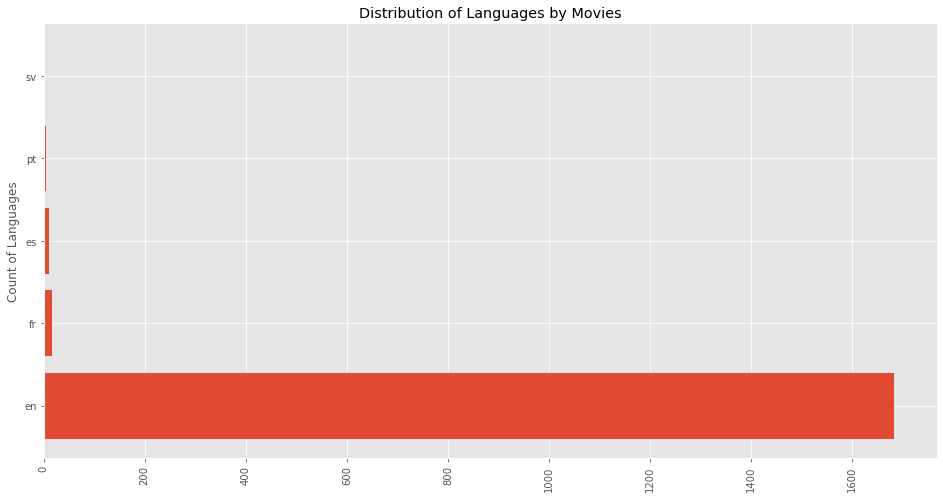

In [37]:
fig, ax = plt.subplots(figsize=(16, 8))

# create variable
top_5_languages = language.iloc[:5]

# plot data
ax.barh(top_5_languages.index, top_5_languages.values)

# Customize appearance
ax.tick_params(axis="x", labelrotation=90)
ax.set_ylabel("Count of Languages")
ax.set_title("Distribution of Languages by Movies")

In [38]:
"""
From the visualization above, english is the most
used language in movies since it reaches a higher audience 
as many people understand English. According to Ethnologue,
English is the largest language in the world for both native and non-native speaker.
"""

'\nFrom the visualization above, english is the most\nused language in movies since it reaches a higher audience \nas many people understand English. According to Ethnologue,\nEnglish is the largest language in the world for both native and non-native speaker.\n'

## Is there a relationship between the ratings of a movie and its worldwide gross?


In [39]:
title_basics_df = pd.read_csv('data/title.akas.csv')
title_basics_df.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [40]:
# Change title column name to movie
title_basics_df.rename(columns={'title':'movie'},inplace=True)
title_basics_df.head()

,title_id,ordering,movie,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [41]:
# Merge DFs
movie_df = microsoft_movies_df.merge(title_basics_df,on='movie')
movie_df.head()

,Unnamed: 0,genre_ids,id_x,original_language,movie,popularity,release_date_x,title,vote_average,vote_count,...,international_gross,profit,percentage_profit,title_id,ordering,region,language,types,attributes,is_original_title
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,277289760,329870992,199.921813,tt0892769,36,NaN,NaN,original,NaN,1.0
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,277289760,329870992,199.921813,tt0892769,39,US,NaN,imdbDisplay,NaN,0.0
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,...,308723058,451156389,265.386111,tt1228705,11,AR,NaN,NaN,NaN,0.0
3,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,...,308723058,451156389,265.386111,tt1228705,15,FR,NaN,imdbDisplay,NaN,0.0
4,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,...,308723058,451156389,265.386111,tt1228705,16,GR,NaN,NaN,NaN,0.0


In [42]:
# Check DF info
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8044 entries, 0 to 8043
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           8044 non-null   int64  
 1   genre_ids            8044 non-null   object 
 2   id_x                 8044 non-null   int64  
 3   original_language    8044 non-null   object 
 4   movie                8044 non-null   object 
 5   popularity           8044 non-null   float64
 6   release_date_x       8044 non-null   object 
 7   title                8044 non-null   object 
 8   vote_average         8044 non-null   float64
 9   vote_count           8044 non-null   int64  
 10  id_y                 8044 non-null   int64  
 11  release_date_y       8044 non-null   object 
 12  production_budget    8044 non-null   int64  
 13  domestic_gross       8044 non-null   int64  
 14  worldwide_gross      8044 non-null   int64  
 15  international_gross  8044 non-null   i

In [43]:
# check missing values
movie_df.isna().sum()

Unnamed: 0                0
genre_ids                 0
id_x                      0
original_language         0
movie                     0
popularity                0
release_date_x            0
title                     0
vote_average              0
vote_count                0
id_y                      0
release_date_y            0
production_budget         0
domestic_gross            0
worldwide_gross           0
international_gross       0
profit                    0
percentage_profit         0
title_id                  0
ordering                  0
region                 1789
language               6940
types                  2091
attributes             7832
is_original_title         1
dtype: int64

In [44]:
# Drop attributes column
movie_df.drop('attributes', inplace=True, axis=1)
movie_df.head()

,Unnamed: 0,genre_ids,id_x,original_language,movie,popularity,release_date_x,title,vote_average,vote_count,...,worldwide_gross,international_gross,profit,percentage_profit,title_id,ordering,region,language,types,is_original_title
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,494870992,277289760,329870992,199.921813,tt0892769,36,NaN,NaN,original,1.0
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,494870992,277289760,329870992,199.921813,tt0892769,39,US,NaN,imdbDisplay,0.0
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,...,621156389,308723058,451156389,265.386111,tt1228705,11,AR,NaN,NaN,0.0
3,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,...,621156389,308723058,451156389,265.386111,tt1228705,15,FR,NaN,imdbDisplay,0.0
4,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,...,621156389,308723058,451156389,265.386111,tt1228705,16,GR,NaN,NaN,0.0


In [45]:
# Join the title.ratings.csv
movie_ratings_df = pd.read_csv('data/title.ratings.csv')
movie_ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [46]:
# Change columm name
movie_ratings_df.rename(columns={'tconst':'title_id'},inplace=True)
movie_ratings_df.head()

,title_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [47]:
# Join tables
movies_df = movie_df.merge(movie_ratings_df,on='title_id')
movies_df.head()

,Unnamed: 0,genre_ids,id_x,original_language,movie,popularity,release_date_x,title,vote_average,vote_count,...,profit,percentage_profit,title_id,ordering,region,language,types,is_original_title,averagerating,numvotes
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,329870992,199.921813,tt0892769,36,NaN,NaN,original,1.0,8.1,611299
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,329870992,199.921813,tt0892769,39,US,NaN,imdbDisplay,0.0,8.1,611299
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,...,451156389,265.386111,tt1228705,11,AR,NaN,NaN,0.0,7.0,657690
3,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,...,451156389,265.386111,tt1228705,15,FR,NaN,imdbDisplay,0.0,7.0,657690
4,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,...,451156389,265.386111,tt1228705,16,GR,NaN,NaN,0.0,7.0,657690


In [48]:
# check for duplicates
movies_df.movie.duplicated().sum()

6045

In [49]:
# Drop duplicates
movies_df.drop_duplicates(subset='movie',keep='first',inplace=True)

In [50]:
# remove duplicate
movies_df.drop_duplicates(subset='title_id',keep='first',inplace=True)

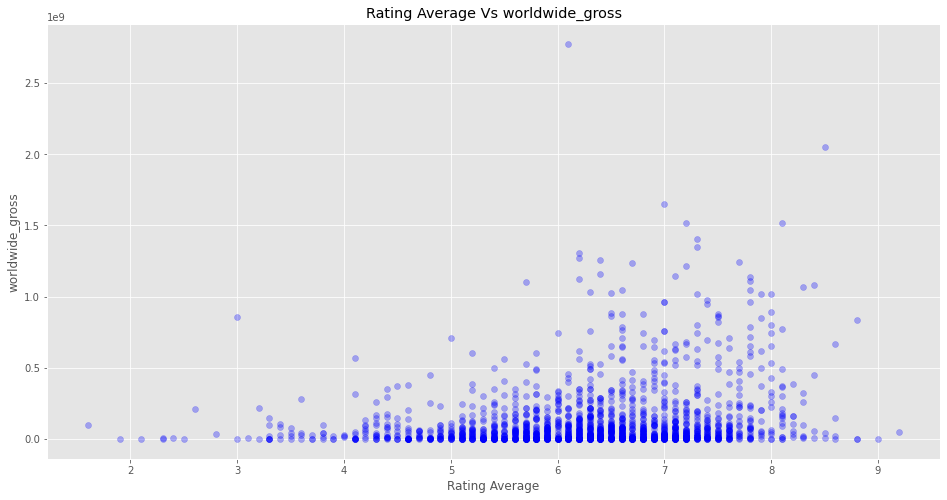

In [65]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter(
    x=movies_df["averagerating"],
    y=movies_df["worldwide_gross"],
    alpha=0.3,
    color='blue'
)

ax.set_xlabel("Rating Average")
ax.set_ylabel("worldwide_gross")
ax.set_title("Rating Average Vs worldwide_gross");

In [52]:
# Check for correlation
print("correlation = ",movies_df['averagerating'].corr(movies_df['worldwide_gross']))

correlation =  0.21450080217124498


In [53]:
"""
There is a weak correlation between the ratings of
a movie and its worlwide gross. 
Though the weak correlation
we can still see that there movies which had high ratings and a 
corresponding high worldwide gross.
"""

'\nThere is a weak correlation between the ratings of\na movie and its worlwide gross. \nThough the weak correlation\nwe can still see that there movies which had high ratings and a \ncorresponding high worldwide gross.\n'

## Movies with the Highest Worldwide gross


In [54]:
movies_df = movies_df.sort_values(['worldwide_gross'],ascending=[False])
movies_df.head()

,Unnamed: 0,genre_ids,id_x,original_language,movie,popularity,release_date_x,title,vote_average,vote_count,...,profit,percentage_profit,title_id,ordering,region,language,types,is_original_title,averagerating,numvotes
32,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676,...,2351345279,553.257713,tt1775309,2,XWW,en,imdbDisplay,0.0,6.1,43
7119,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,...,1748134200,582.711400,tt4154756,10,AR,NaN,imdbDisplay,0.0,8.5,670926
4916,14193,"[28, 12, 878, 53]",135397,en,Jurassic World,20.709,2015-06-12,Jurassic World,6.6,14056,...,1433854864,666.909239,tt0369610,14,FR,NaN,imdbDisplay,0.0,7.0,539338
4954,14196,"[28, 80, 53]",168259,en,Furious 7,20.396,2015-04-03,Furious 7,7.3,6538,...,1328722794,699.327786,tt2820852,10,NL,NaN,imdbDisplay,0.0,7.2,335074
2111,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673,...,1292935897,574.638176,tt0848228,19,NaN,NaN,original,1.0,8.1,1183655


In [55]:
movies_df.columns


Index(['Unnamed: 0', 'genre_ids', 'id_x', 'original_language', 'movie',
       'popularity', 'release_date_x', 'title', 'vote_average', 'vote_count',
       'id_y', 'release_date_y', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'international_gross', 'profit', 'percentage_profit',
       'title_id', 'ordering', 'region', 'language', 'types',
       'is_original_title', 'averagerating', 'numvotes'],
      dtype='object')

In [56]:
# Top 10 movies with the highest worldwide gross
top_10_movies_df = movies_df.drop(['Unnamed: 0',
                                  'genre_ids',
                                  'id_x',
                                  'popularity',
                                  'title',
                                  'vote_average',
                                  'vote_count',
                                  'id_y',
                                  'release_date_y',
                                  'ordering',
                                  'is_original_title',
                                  'numvotes',
                                  'types',
                                  'language'],axis = 1).head(10)
top_10_movies_df

,original_language,movie,release_date_x,production_budget,domestic_gross,worldwide_gross,international_gross,profit,percentage_profit,title_id,region,averagerating
32,en,Avatar,2009-12-18,425000000,760507625,2776345279,2015837654,2351345279,553.257713,tt1775309,XWW,6.1
7119,en,Avengers: Infinity War,2018-04-27,300000000,678815482,2048134200,1369318718,1748134200,582.711400,tt4154756,AR,8.5
4916,en,Jurassic World,2015-06-12,215000000,652270625,1648854864,996584239,1433854864,666.909239,tt0369610,FR,7.0
4954,en,Furious 7,2015-04-03,190000000,353007020,1518722794,1165715774,1328722794,699.327786,tt2820852,NL,7.2
2111,en,The Avengers,2012-05-04,225000000,623279547,1517935897,894656350,1292935897,574.638176,tt0848228,NaN,8.1
4831,en,Avengers: Age of Ultron,2015-05-01,330600000,459005868,1403013963,944008095,1072413963,324.384139,tt2395427,US,7.3
1980,en,Black Panther,2011-01-18,200000000,700059566,1348258224,648198658,1148258224,574.129112,tt1825683,FR,7.3
7229,en,Jurassic World: Fallen Kingdom,2018-06-22,170000000,417719760,1305772799,888053039,1135772799,668.101646,tt4881806,US,6.2
468,en,Frozen,2010-02-05,150000000,400738009,1272469910,871731901,1122469910,748.313273,tt1323045,SE,6.2
2119,en,Beauty and the Beast,2012-01-13,160000000,504014165,1259199706,755185541,1099199706,686.999816,tt2316801,XWW,6.4


In [57]:
# Summary Statistics of the top 10 movies with the highest worldwide gross
top_10_movies_df.describe()

,production_budget,domestic_gross,worldwide_gross,international_gross,profit,percentage_profit,averagerating
count,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,10.000000,10.000000
mean,2.365600e+08,5.549418e+08,1.609871e+09,1.054929e+09,1.373311e+09,607.877230,7.030000
std,8.835850e+07,1.445252e+08,4.727618e+08,3.933530e+08,4.006700e+08,119.110752,0.824688
min,1.500000e+08,3.530070e+08,1.259200e+09,6.481987e+08,1.072414e+09,324.384139,6.100000
25%,1.750000e+08,4.280413e+08,1.316394e+09,8.758122e+08,1.125796e+09,574.256378,6.250000
50%,2.075000e+08,5.636469e+08,1.460475e+09,9.193322e+08,1.220597e+09,624.810320,7.100000
75%,2.812500e+08,6.721793e+08,1.616322e+09,1.123433e+09,1.407572e+09,682.275274,7.300000
max,4.250000e+08,7.605076e+08,2.776345e+09,2.015838e+09,2.351345e+09,748.313273,8.500000


Text(0.5, 1.0, 'Top Ten Movies With Highest Worldwide Gross')

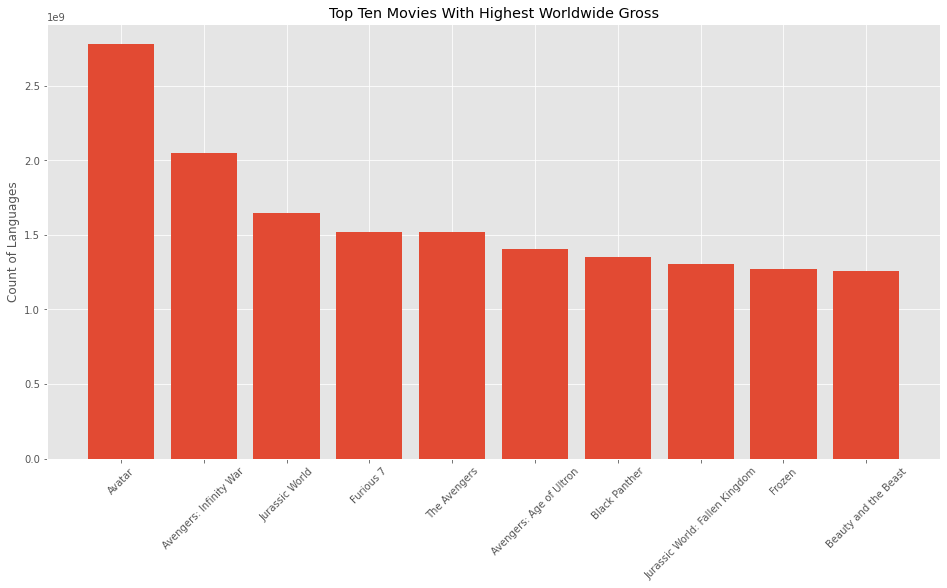

In [66]:
# Visualize data
fig, ax = plt.subplots(figsize=(16, 8))

# plot data
ax.bar(top_10_movies_df.movie, top_10_movies_df.worldwide_gross)

# Customize appearance
ax.tick_params(axis="x", labelrotation=45)
ax.set_ylabel("Count of Languages")
ax.set_title("Top Ten Movies With Highest Worldwide Gross")

In [59]:
"""
For the top to movies with the highest worldwide gross,
we can observe som similar characteristics eg their original
language is English and also their production budget was very high.
"""

'\nFor the top to movies with the highest worldwide gross,\nwe can observe som similar characteristics eg their original\nlanguage is English and also their production budget was very high.\n'

* Does runtime affect the worldwide gross?

In [60]:
# Import title.basics.csv
title_df = pd.read_csv('data/title.basics.csv')
title_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [61]:
# change column name
title_df.rename(columns={'tconst':'title_id'},inplace=True)

In [62]:
title_df.head()

,title_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [63]:
runtime_df = title_df.drop(['primary_title','original_title'],axis=1)
runtime_df.head()

,title_id,start_year,runtime_minutes,genres
0,tt0063540,2013,175.0,"Action,Crime,Drama"
1,tt0066787,2019,114.0,"Biography,Drama"
2,tt0069049,2018,122.0,Drama
3,tt0069204,2018,NaN,"Comedy,Drama"
4,tt0100275,2017,80.0,"Comedy,Drama,Fantasy"


In [64]:
# merge tables
movies_DF = movies_df.merge(runtime_df,on='title_id')
movies_DF.head()

,Unnamed: 0,genre_ids,id_x,original_language,movie,popularity,release_date_x,title,vote_average,vote_count,...,ordering,region,language,types,is_original_title,averagerating,numvotes,start_year,runtime_minutes,genres
0,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676,...,2,XWW,en,imdbDisplay,0.0,6.1,43,2011,93.0,Horror
1,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,...,10,AR,NaN,imdbDisplay,0.0,8.5,670926,2018,149.0,"Action,Adventure,Sci-Fi"
2,14193,"[28, 12, 878, 53]",135397,en,Jurassic World,20.709,2015-06-12,Jurassic World,6.6,14056,...,14,FR,NaN,imdbDisplay,0.0,7.0,539338,2015,124.0,"Action,Adventure,Sci-Fi"
3,14196,"[28, 80, 53]",168259,en,Furious 7,20.396,2015-04-03,Furious 7,7.3,6538,...,10,NL,NaN,imdbDisplay,0.0,7.2,335074,2015,137.0,"Action,Crime,Thriller"
4,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673,...,19,NaN,NaN,original,1.0,8.1,1183655,2012,143.0,"Action,Adventure,Sci-Fi"


* conclusion and Recommendation



* In order to reach a wider audience, the movies should originally be in English since it is the most used language in the world
* In order to increase the worldwide gross one should:
* Promote the movie locally since an increase in the domestic gross leads to a corresponding increase in foreign gross.
* Increase in the movie budget which means get quality production in order for movie to be able to sell more 